In [ ]:
import torch
import torchvision
import pandas as pd
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchsummary import summary

In [ ]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]),
                     target_transform=lambda y: torch.randint(0,10,(1,)).item())
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
training_set=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testing_set=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,500)
        self.fc2=nn.Linear(500,100)
        self.fc3=nn.Linear(100,50)
        self.fc4=nn.Linear(50,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1 )
        
net=Net()
print(net)

summary(net,(1,784))

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]         392,500
            Linear-2               [-1, 1, 100]          50,100
            Linear-3                [-1, 1, 50]           5,050
            Linear-4                [-1, 1, 10]             510
Total params: 448,160
Trainable params: 448,160
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.71
Estimated Total Size (MB): 1.72
----------------------------------------------------------------


In [ ]:
training_loss = 0.0
v_loss = 0.0
v_loss_min=-1.0
training_loss_list=[]
v_loss_list=[]
optim=optim.Adam(net.parameters(),lr=0.01)

for epoch in range(10):
    for y_input, y_pred in training_set:
        net.zero_grad()
        output = net(y_input.view(-1,28*28))
        loss = F.nll_loss(output,y_pred)
        training_loss_list.append(loss.item())
        loss.backward()
        optim.step()
        training_loss += loss.item()


    for y_input, y_pred in testing_set:
        output = net(y_input.view(-1,784))
        loss = F.poisson_nll_loss(output,y_pred)
        v_loss_list.append(loss.item())
        v_loss += loss.item()
    
    
training_loss = training_loss/len(training_set)
v_loss = v_loss/len(testing_set)

print('Epoch:  . Training Loss: {:.6f}. Validation_loss: {:.6f}'.format(training_loss,v_loss))

if v_loss <= v_loss_min:
    print( 'Varidation Loss is decrease: ( {:.6f} -->{:.6f}). save the model...'.format(v_loss_min, v_loss))
    torch.save(model.state_dict(), 'mlp2_model.pt')
    v_loss_min = v_loss

Epoch:  . Training Loss: 23.054432. Validation_loss: 103.425756


<ipython-input-18-741198342376>:4: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Valid','train')
<ipython-input-18-741198342376>:4: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Valid','train')
<ipython-input-18-741198342376>:4: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Valid','train')
<ipython-input-18-741198342376>:4: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.

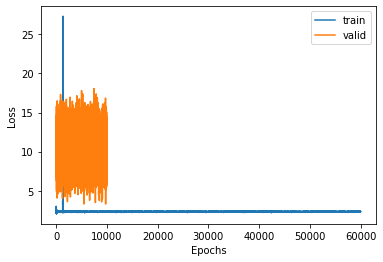

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss_list,label='train')
plt.plot(v_loss_list,label='valid')
plt.legend('Valid','train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()